# Линейная Регрессия и Градиентный Спуск
Задание курса **Coursera ML with Andrew Ng**. Неделя 2.
Практическая реализация алгоритма линейной регрессии для 1 и более параметров. 
Для подбора оптимальных параметров $ \theta $ будут разработаны алгоритмы *градиентного спуска* и *нормализованного уравнения (normal equation)*. Также будет произведено *уплотнение (feature scaling)* для более гладкой работы спуска.
## Подготовка датасетов

In [4]:
import numpy as np, pandas as pd,matplotlib.pyplot as plt,mpl_toolkits.mplot3d, utils
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

%cd ~/Documents/ML/machine-learning-ex1/ex1/

# One-feature dataset. M=96 N=1
dataset_1X = pd.read_csv("ex1data1.txt")

X1 = dataset_1X.to_numpy()[:,0].reshape(96,1)
X1 = np.concatenate((np.ones((X1.shape[0],1)),X1),1)
Y1 = dataset_1X.to_numpy()[:,1].reshape(96,1)

# Two-features dataset. M=46 N=2
dataset_multiX = pd.read_csv("ex1data2.txt")

X2 = dataset_multiX.to_numpy()[:,0:2].reshape(46,2)
X2 = np.concatenate((np.ones((X2.shape[0],1)),X2),1)
Y2 = dataset_multiX.to_numpy()[:,2].reshape(46,1)

/Users/love/Documents/ML/machine-learning-ex1/ex1


## Стоимостная функция J($ \theta $) в линейной регрессии
Стоимостная функция показывает ошибку в отклонении гипотететической функции от датасета. Соответственно, предпочтительно минимизировать J($ \theta $), используя алгоритмы оптимизации параметров.

В линейной регрессии нам достаточно считать суммарную квадратную ошибку: $$ J(\theta) = \frac{1}{2m} \sum \limits _{i=1} ^{m} [h_{\theta}(x^{(i)}) - y^{(i)}]^2  $$

Или в векторном виде:
$$ J(\theta) = \frac{1}{2m} \sum (\vec{h}(\mathbf{X}) - \vec{y})^2 $$
где $ \vec{h}(\mathbf{X}) \in \mathbb{R}^{m \times 1} $ — вектор всех гипотез,
$ \vec{y} \in \mathbb{R}^{m \times 1} $ — вектор всех выходных значений.

$$ \vec{h}(\mathbf{X}) = \mathbf{X} \times \mathbf{\theta} $$

где $ \mathbf{X} \in  \mathbb{R}^{m \times (n + 1)}, \mathbf{\theta} \in \mathbb{R}^{(n + 1) \times 1} $ и результирующая матрица $ \vec{h}(\mathbf{X}) \in \mathbb{R}^{m \times 1} $

In [1]:
def hypothesis(X, theta):
    return X @ theta

In [4]:
def cost(X, y, theta):
    m, n = X.shape
    h = hypothesis(X,theta)
    
    J = 1/(2*m) * np.sum((h - y) ** 2)
    return J

In [8]:
theta = np.zeros((X1.shape[1], 1))
J = cost(X1,Y1,theta)
print ("1. Cost function for one-feature dataset is %.3f" %J)

theta = np.zeros((X2.shape[1],1))
J = cost(X2, Y2,theta)
print ("2. Cost function for two-features dataset is %.3f" %J)

1. Cost function for one-feature dataset is 30.795
2. Cost function for two-features dataset is 65279190347.902


## Градиентный спуск
Градиентный спуск — один из простейший алгоритмов оптимизации параметров $ \theta $. Его суть с любым алгоритмом заключается в постепенном уменьшении стоимостной функции J($ \theta $) до нахождения глобального минимума, где и будут оптимальные параметры $ \vec{\theta} $.

Каждый шаг спуска вычисляется следующим образом:
$$ \theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\vec{\theta})$$
Возьмем производную:
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum \limits _{i=1} ^{m} [(h(x^{(i)}) - y^{(i)})\times x^{(i)}]$$

Что можно записать в векторном виде как:
$$ \vec{\theta} = \vec{\theta} - \frac{\alpha}{m} \times \vec{\delta} $$

In [9]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m, n = X.shape
    J = 0
    J_history = np.zeros((num_iters,1))
    
    for i in range(num_iters):
        h = X @ theta
        delta = 1/m * (h - y).T @ X
        theta = theta - alpha * delta.T
        
        J = cost(X,y,theta)
        J_history[i] = J
    return (J, J_history,theta)

In [ ]:
plt.

Final J is 4.912. 
Optimal parameters are [[-0.22048396  0.81381451]]


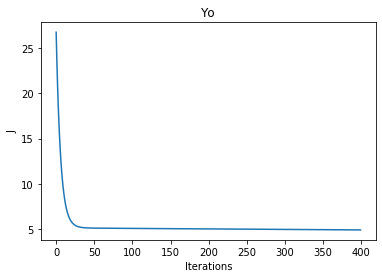

(96, 2) (2, 1)


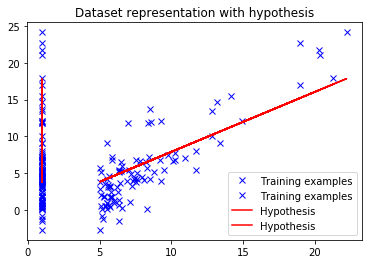

In [37]:
learning_rate = 0.001
iterations = 400

theta = np.zeros((X1.shape[1], 1))
(J, history, theta) = gradient_descent(X1,Y1,theta,learning_rate,iterations)
print("Final J is %.3f. \nOptimal parameters are %s" %(J, theta.T))

utils.draw_J_history(history)
utils.draw_hypothesis(X1,Y1,theta)

In [ ]:
(J, history,thet) = gradient_descent(X,Y,theta,learning_rate,iterations)

# data representation
plt.plot(X[:,1], Y, "bx", label = "Training example")
plt.plot(X[:,1], X @ thet,"r-", label = "Hypothesis")

if X.shape[1] > 2:
    plt.plot(X[:,2],Y, "rx", label = "Feature 2")
    
plt.legend()
plt.show()

# Error derivative by iterations
plt.plot(np.arange(iterations), history)
plt.xlabel("Iterations")
plt.ylabel("J")
plt.show()

In [8]:
X = test_X2
Y = test_Y2.reshape(46,1)
theta = np.array([[0],[0],[0]])

def gradient_descent2(X, y, theta, alpha, num_iters):
    m = X.shape[0]
    J = 0
    J_history = np.zeros((num_iters,1))
    
    for i in range(num_iters):
        h = X @ theta
        delta = 1/m * (h - y).T @ X
        
#         print("J = %.2f on %d" %(compute_cost(X,y,theta),i))
#         print(delta.shape, h.shape,(y).shape, theta.shape)
        theta = theta - alpha * delta.T
        
        J_history[i] = compute_cost(X,y,theta)
    return (J, J_history,theta)

print("Final J = %.2f" %gradient_descent2(X,Y,theta,learning_rate,iterations)[0])

Final J = 0.00


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in matmul
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in matmul
  if sys.path[0] == '':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in subtract
  app.launch_new_instance()


## Уплотнение (Feature Scaling)

array([[  96.        ,  785.3905    ],
       [ 785.3905    , 7858.84913173]])

## Нормализирующее уравнение

In [19]:
def normal_equation(X,y):
    theta = np.linalg.pinv(X.T @ X) @ X.T @ y
    return theta

In [23]:
[theta1, theta2] = normal_equation(X1,Y1)
print("Via normal equation for one-featured dataset optimal parameters are: %.3f and %.3f" %(theta1,theta2))

Via normal equation for one-featured dataset optimal parameters are: -4.212 and 1.214
